#Falcon-40B
Falcon-40B is a 40B parameters causal decoder-only model built by TII and trained on 1,000B tokens of RefinedWeb enhanced with curated corpora. It is made available under the Apache 2.0 license.

Falcon 40B is the UAE’s and the Middle East’s first home-grown, open-source large language model (LLM) with 40 billion parameters trained on one trillion tokens. The brainchild of the Technology Innovation Institute (TII), Falcon 40B has generated a tremendous amount of global interest and intrigue, but what really sweetens the deal is its transparent, open-source feature.

TII is now calling for proposals from users worldwide to submit their most creative ideas for Falcon 40B’s deployment – allowing them to share their knowledge, enhance the software, and potentially transform their ideas into reality! Take that, ChatGPT! Worth checking out? Give it a go and see for yourself!



Original Source -
<br>

https://huggingface.co/tiiuae/falcon-40b

https://huggingface.co/blog/falcon

## The Falcon models
The Falcon family is composed of two base models: Falcon-40B and its little brother Falcon-7B. The 40B parameter model currently tops the charts of the Open LLM Leaderboard, while the 7B model is the best in its weight class.

Falcon-40B requires ~90GB of GPU memory — that’s a lot, but still less than LLaMA-65B, which Falcon outperforms. On the other hand, Falcon-7B only needs ~15GB, making inference and finetuning accessible even on consumer hardware. (Later in this blog, we will discuss how we can leverage quantization to make Falcon-40B accessible even on cheaper GPUs!)

TII has also made available instruct versions of the models, Falcon-7B-Instruct and Falcon-40B-Instruct. These experimental variants have been finetuned on instructions and conversational data; they thus lend better to popular assistant-style tasks. If you are just looking to quickly play with the models they are your best shot. It’s also possible to build your own custom instruct version, based on the plethora of datasets built by the community—keep reading for a step-by-step tutorial!

Falcon-7B and Falcon-40B have been trained on 1.5 trillion and 1 trillion tokens respectively, in line with modern models optimising for inference. The key ingredient for the high quality of the Falcon models is their training data, predominantly based (>80%) on RefinedWeb — a novel massive web dataset based on CommonCrawl. Instead of gathering scattered curated sources, TII has focused on scaling and improving the quality of web data, leveraging large-scale deduplication and strict filtering to match the quality of other corpora. The Falcon models still include some curated sources in their training (such as conversational data from Reddit), but significantly less so than has been common for state-of-the-art LLMs like GPT-3 or PaLM. The best part? TII has publicly released a 600 billion tokens extract of RefinedWeb for the community to use in their own LLMs!

Another interesting feature of the Falcon models is their use of multiquery attention. The vanilla multihead attention scheme has one query, key, and value per head; multiquery instead shares one key and value across all heads.



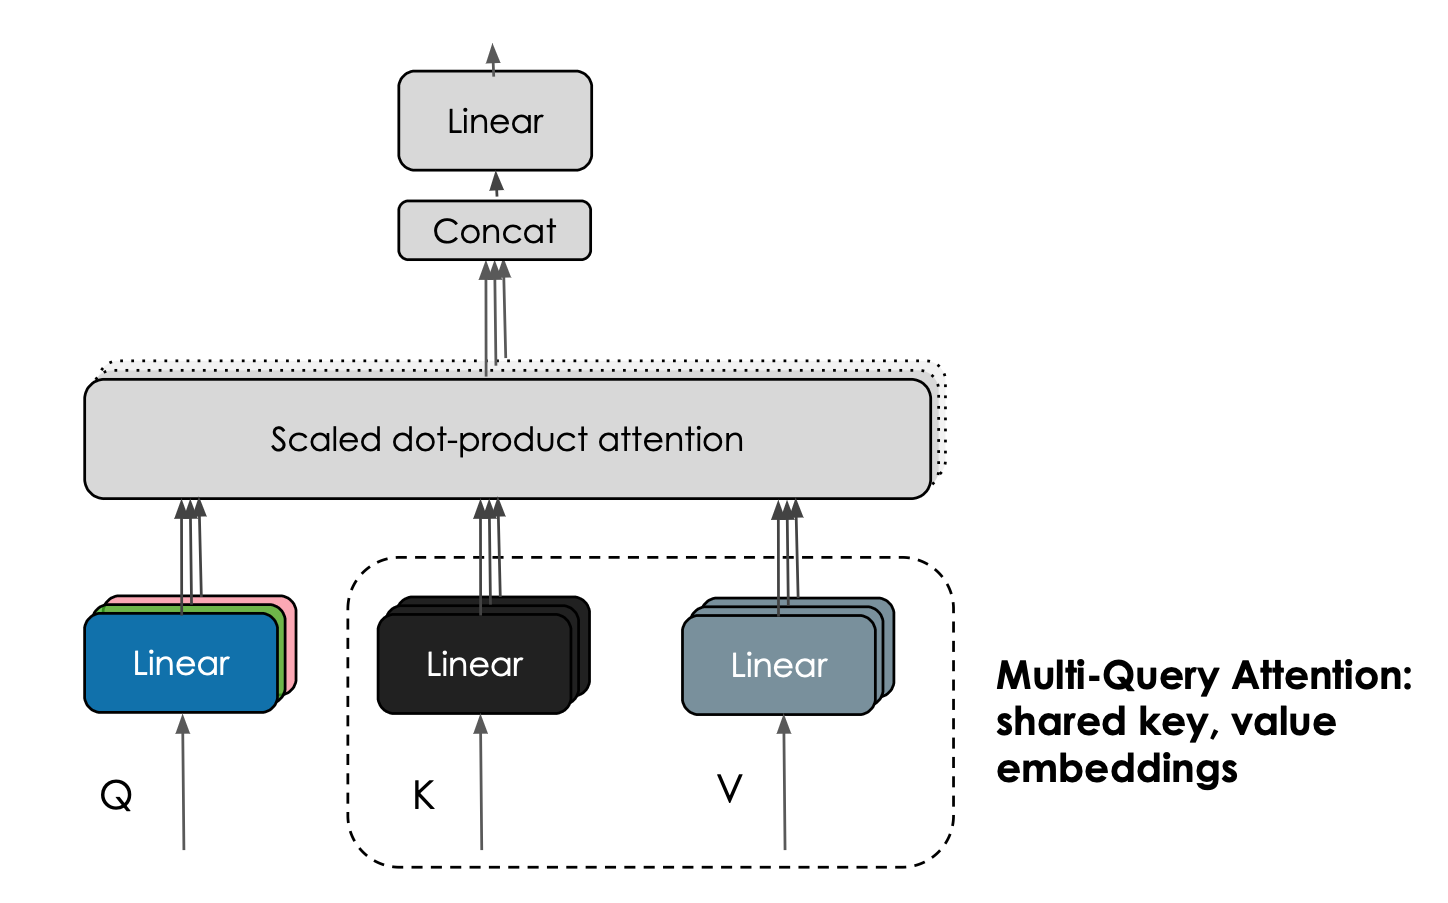

## Multi-Query Attention
shares keys and value embeddings across attention heads. Courtesy Harm de Vries.
This trick doesn’t significantly influence pretraining, but it greatly improves the scalability of inference: indeed, the K,V-cache kept during autoregressive decoding is now significantly smaller (10-100 times depending on the specific of the architecture), reducing memory costs and enabling novel optimizations such as statefulness.




Model	License	Commercial use?	Pretraining length [tokens]	Pretraining compute [PF-days]	Leaderboard score	K,V-cache size for a 2.048 context
StableLM-Alpha-7B	CC-BY-SA-4.0	✅	1,500B	700	38.3*	800MB
LLaMA-7B	LLaMA license	❌	1,000B	500	47.6	1,100MB
MPT-7B	Apache 2.0	✅	1,000B	500	48.6	1,100MB
Falcon-7B	Apache 2.0	✅	1,500B	700	48.8	20MB
LLaMA-33B	LLaMA license	❌	1,500B	3200	56.9	3,300MB
LLaMA-65B	LLaMA license	❌	1,500B	6300	58.3	5,400MB
Falcon-40B	Apache 2.0	✅	1,000B	2800	60.4	240MB

You can easily try the Big Falcon Model (40 billion parameters!) in this Space

https://huggingface.co/spaces/HuggingFaceH4/falcon-chat

Under the hood, this playground uses Hugging Face's Text Generation Inference, a scalable Rust, Python, and gRPC server for fast & efficient text generation. It's the same technology that powers HuggingChat.

We've also built a Core ML version of the 7B instruct model, and this is how it runs on an M1 MacBook Pro:

The video shows a lightweight app that leverages a Swift library for the heavy lifting: model loading, tokenization, input preparation, generation, and decoding. We are busy building this library to empower developers to integrate powerful LLMs in all types of applications without having to reinvent the wheel. It's still a bit rough, but we can't wait to share it with you. Meanwhile, you can download the Core ML weights from the repo and explore them yourself!

https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/blog/147_falcon/falcon-7b.mp4

## Inference
You can use the familiar transformers APIs to run the models on your own hardware, but you need to pay attention to a couple of details:

The models were trained using the bfloat16 datatype, so we recommend you use the same. This requires a recent version of CUDA and works best on modern cards. You may also try to run inference using float16, but keep in mind that the models were evaluated using bfloat16.
You need to allow remote code execution. This is because the models use a new architecture that is not part of transformers yet - instead, the code necessary is provided by the model authors in the repo. Specifically, these are the files whose code will be used if you allow remote execution (using falcon-7b-instruct as an example): configuration_RW.py, modelling_RW.py.
With these considerations, you can use the transformers pipeline API to load the 7B instruction model like this:

In [ ]:
!pip install transformers accelerate einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00


Load the libraries

and

Load the Tokenizer

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

model = "mrm8488/falcoder-7b" #tiiuae/falcon-40b-instruct

tokenizer = AutoTokenizer.from_pretrained(model)

Build the Model Pipeline using Hugging Face Transformers Pipeline

In [ ]:
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusFor

Model Inference using the pipeline that was built above

In [ ]:
prompt = " build me a python method that can find phone numbers in text "

In [ ]:
sequences = pipeline(
    prompt,
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Print the Final Result

In [ ]:
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Result:  build me a python method that can find phone numbers in text (English or Hindi).

### Solution:
def find_number(text): 
    if " " in text:  
        text = re.sub('[^0-9]','',text) 
    phone_list = []
    words = text.split() 
    for word in words: 
        #print(word) 
        for i in range(len(words), 0, -1):  
            if words[i]!='' and words[i]!= ':': 
                #print(words[i]) 
                phone_list.append(words[i]) 
    phone_list = [phone for phone in phone_list if phone and phone.isdigit()] 
    return phone_list 

def find_numbers(text): 
    return find_number(text) 

if __name
